In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

In [3]:
df = pd.read_csv('data/finalTrain.csv')

In [4]:
df_new=df.copy()

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [6]:
#ID and Delivery_Person_ID is redundent --> Drop it
#Direct relation b/w Time_Orderd and Road_traffic_density --> Drop Time_Orderd & Time_Order_picked

In [7]:
df_new['Delivery_person_Age'].isnull().sum()

1854

In [8]:
#fill null with median
df_new['Delivery_person_Age']=df_new['Delivery_person_Age'].fillna(df_new['Delivery_person_Age'].median())

In [9]:
df['Delivery_person_Ratings'].isnull().sum()

1908

c:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Delivery_person_Ratings'>

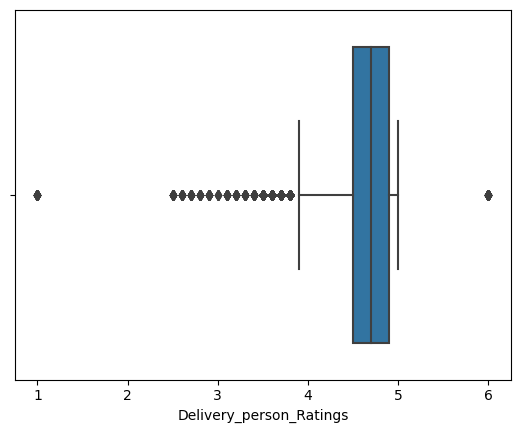

In [10]:
sns.boxplot(df_new['Delivery_person_Ratings'])

In [11]:
df_new['Delivery_person_Ratings']=df_new['Delivery_person_Ratings'].fillna(df_new['Delivery_person_Ratings'].median())

In [12]:
df_new['Day']=df_new['Order_Date'].str.split('-').str[0]
df_new['Month']=df_new['Order_Date'].str.split('-').str[1].str.split('-').str[0]
df_new['Year']=df_new['Order_Date'].str.split('-').str[2]

In [13]:
df_new['Day']= df_new['Day'].astype('int')
df_new['Month']= df_new['Month'].astype('int')
df_new['Year']= df_new['Year'].astype('int')

In [14]:
df_new=df_new.drop(labels=['ID','Delivery_person_ID','Order_Date','Time_Orderd','Time_Order_picked'], axis=1)

In [15]:
df_new['Weather_conditions'].value_counts()

Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: Weather_conditions, dtype: int64

In [16]:
df_new['Weather_conditions']=df_new['Weather_conditions'].map({'Sunny':6, 'Cloudy':5, 'Windy':4,'Sandstorms':3, 'Stormy':2,'Fog':1 })


In [17]:
df_new['Road_traffic_density'].value_counts()

Low       15476
Jam       14139
Medium    10945
High       4423
Name: Road_traffic_density, dtype: int64

In [18]:
df_new['Road_traffic_density']=df['Road_traffic_density'].map({'Jam':4, 'High':3, 'Medium':2,'Low':1})

In [19]:
df_new['Vehicle_condition'].value_counts()

2    15031
1    15028
0    15005
3      520
Name: Vehicle_condition, dtype: int64

In [20]:
df_new['Type_of_order'].value_counts()

Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: Type_of_order, dtype: int64

In [21]:
df_new['Type_of_order']=df_new['Type_of_order'].map({'Buffet':4, 'Meal':3, 'Snack':2,'Drinks':1 })

In [22]:
df_new['Type_of_vehicle'].value_counts()

motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: Type_of_vehicle, dtype: int64

In [23]:
df_new['Type_of_vehicle']=df_new['Type_of_vehicle'].map({'bicycle':1, 'electric_scooter':2, 'scooter':3,'motorcycle':4 })

In [24]:
df_new['multiple_deliveries'].isnull().sum()

993

In [25]:
df_new['multiple_deliveries']=df_new['multiple_deliveries'].fillna(df_new['multiple_deliveries'].median())

In [26]:
df_new['Festival'].isnull().sum()

228

In [27]:
df_new['Festival'].value_counts()

No     44460
Yes      896
Name: Festival, dtype: int64

In [28]:
df_new['Festival']=df_new['Festival'].fillna(0)

In [29]:
df_new['Festival'] = df_new['Festival'].map({'No':0, 'Yes':1})

In [30]:
df_new['City'].isnull().sum()

1200

In [31]:
df_new['City'].value_counts()

Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: City, dtype: int64

In [32]:
df_new['City'] = df_new['City'].map({'Metropolitian':1, 'Urban':2, 'Semi-Urban':1})

In [33]:
df_new['City']=df_new['City'].fillna(1)

In [34]:
df_new.head(10)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month,Year
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,1.0,4.0,2,2,4,3.0,0.0,1.0,46,12,2,2022
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2.0,3.0,1,3,4,1.0,0.0,1.0,23,13,2,2022
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,3.0,2.0,1,1,3,1.0,0.0,1.0,21,4,3,2022
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,3.0,1.0,0,4,4,0.0,0.0,1.0,20,13,2,2022
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1.0,4.0,1,2,3,1.0,0.0,1.0,41,14,2,2022
5,29.0,4.5,19.176269,72.836721,19.266269,72.926721,3.0,4.0,2,4,2,1.0,0.0,1.0,20,2,4,2022
6,35.0,4.0,12.311072,76.654878,12.351072,76.694878,4.0,3.0,1,3,3,1.0,0.0,1.0,33,1,3,2022
7,33.0,4.2,18.592718,73.773572,18.702718,73.883572,3.0,4.0,2,2,4,1.0,0.0,1.0,40,16,3,2022
8,34.0,4.9,17.426228,78.407495,17.496228,78.477495,5.0,4.0,0,2,4,1.0,0.0,1.0,41,20,3,2022
9,21.0,4.7,22.552672,88.352885,22.582672,88.382885,4.0,4.0,0,3,4,1.0,0.0,2.0,15,15,2,2022


In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45584 non-null  float64
 1   Delivery_person_Ratings      45584 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           44968 non-null  float64
 7   Road_traffic_density         44983 non-null  float64
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  int64  
 10  Type_of_vehicle              45584 non-null  int64  
 11  multiple_deliveries          45584 non-null  float64
 12  Festival                     45356 non-null  float64
 13  City            

<AxesSubplot: >

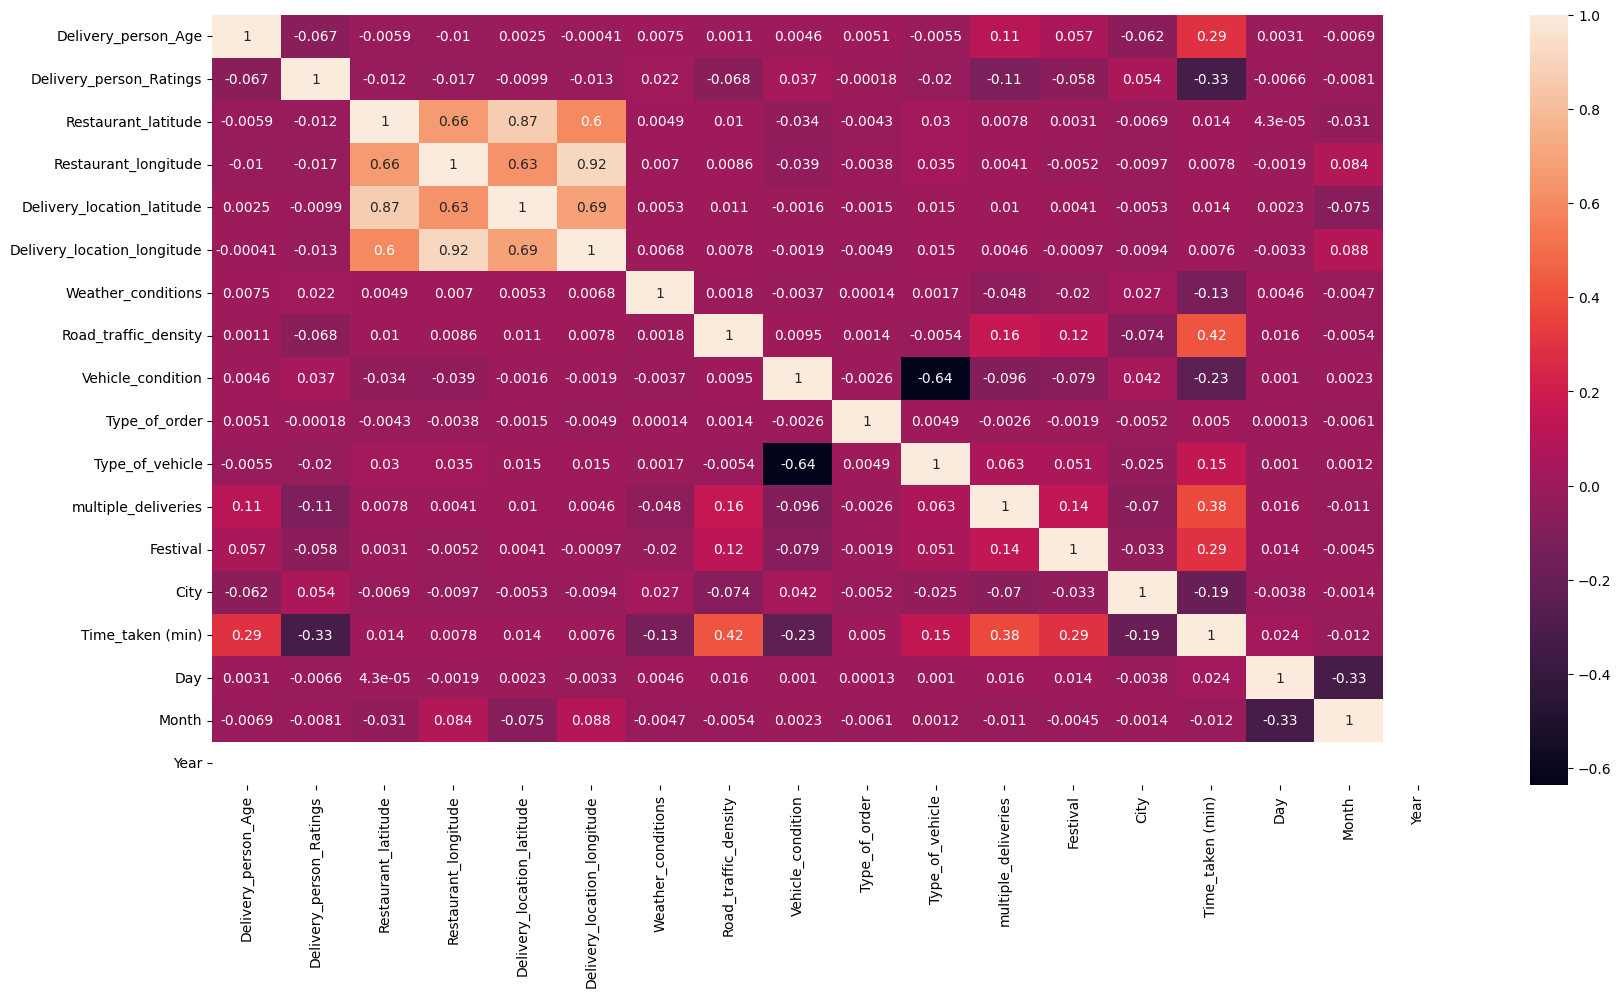

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),annot=True)

In [37]:
# Calculate Distance between resturant and location
R =6371
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

In [38]:
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

In [39]:
df_new['distance'] = np.nan

In [40]:
for i in range(len(df_new)):
    df_new.loc[i, 'distance'] = distcalculate(df_new.loc[i, 'Restaurant_latitude'], 
                                        df_new.loc[i, 'Restaurant_longitude'], 
                                        df_new.loc[i, 'Delivery_location_latitude'], 
                                        df_new.loc[i, 'Delivery_location_longitude'])

In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45584 non-null  float64
 1   Delivery_person_Ratings      45584 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           44968 non-null  float64
 7   Road_traffic_density         44983 non-null  float64
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  int64  
 10  Type_of_vehicle              45584 non-null  int64  
 11  multiple_deliveries          45584 non-null  float64
 12  Festival                     45356 non-null  float64
 13  City            

In [42]:
df_new=df_new.drop(labels=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'], axis=1)

In [43]:
df_new.head(4)

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month,Year,distance
0,36.0,4.2,1.0,4.0,2,2,4,3.0,0.0,1.0,46,12,2,2022,10.280582
1,21.0,4.7,2.0,3.0,1,3,4,1.0,0.0,1.0,23,13,2,2022,6.242319
2,23.0,4.7,3.0,2.0,1,1,3,1.0,0.0,1.0,21,4,3,2022,13.787860
3,34.0,4.3,3.0,1.0,0,4,4,0.0,0.0,1.0,20,13,2,2022,2.930258


<AxesSubplot: >

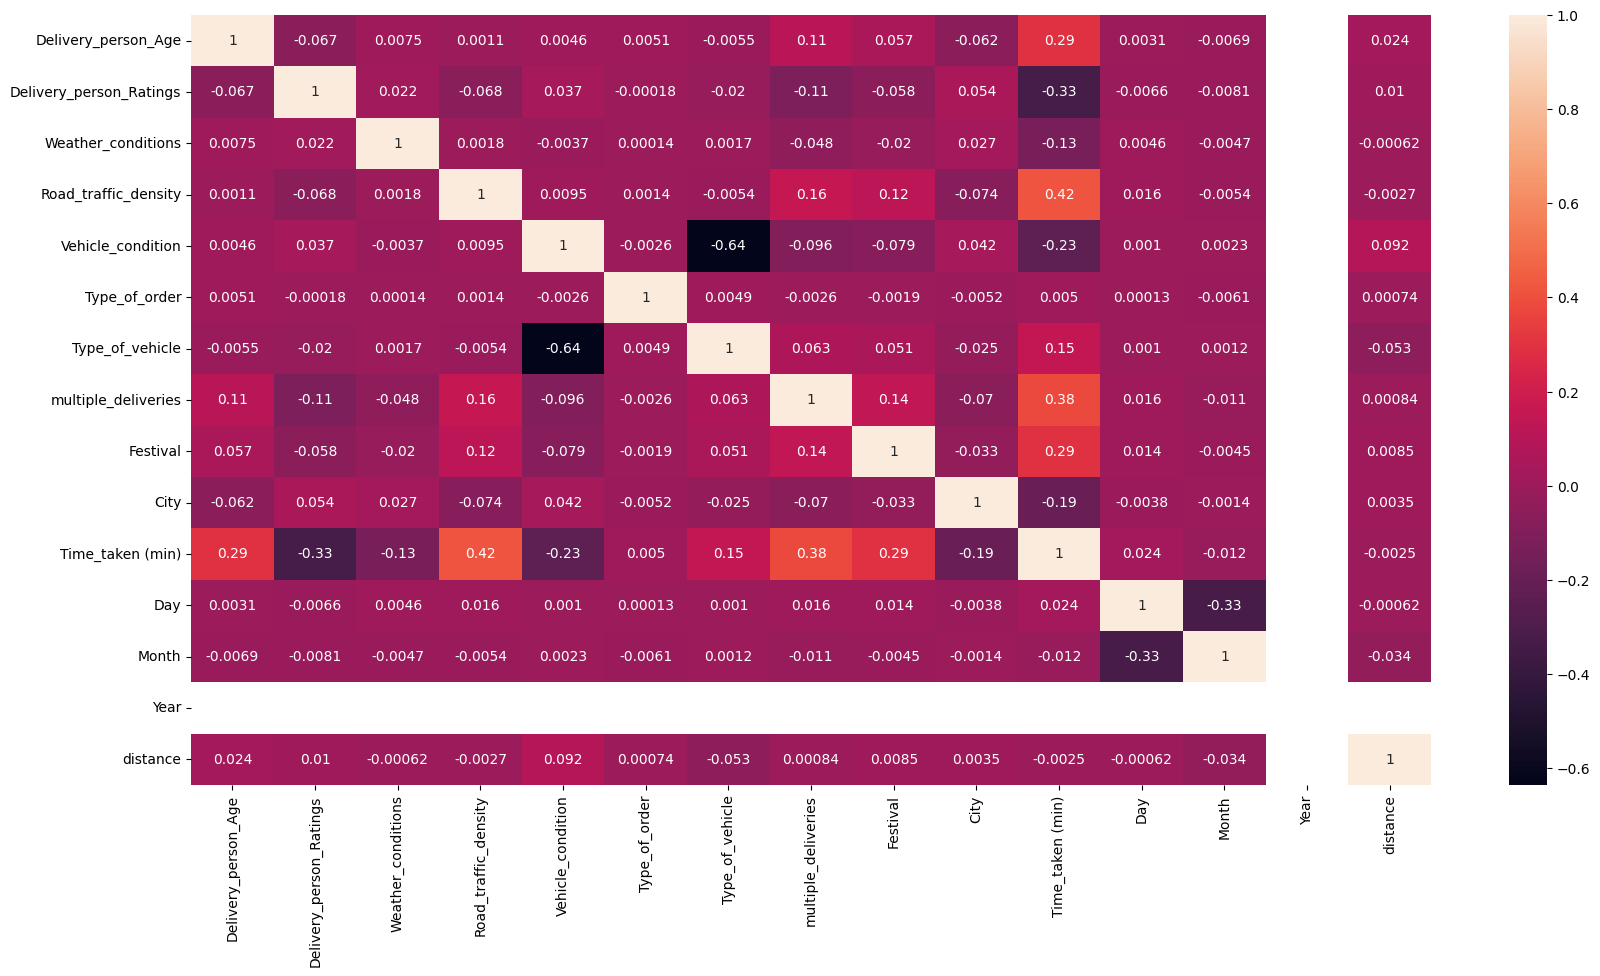

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),annot=True)

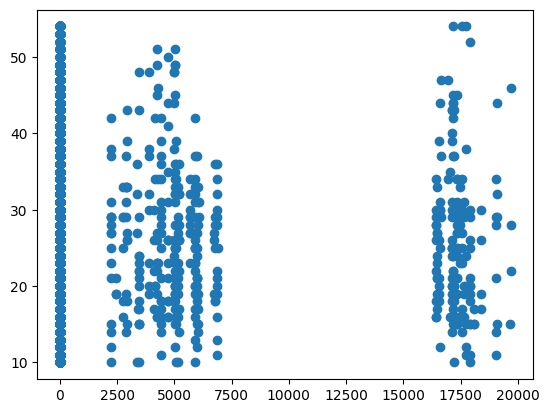

In [45]:
plt.scatter(data=df_new, x='distance', y='Time_taken (min)')

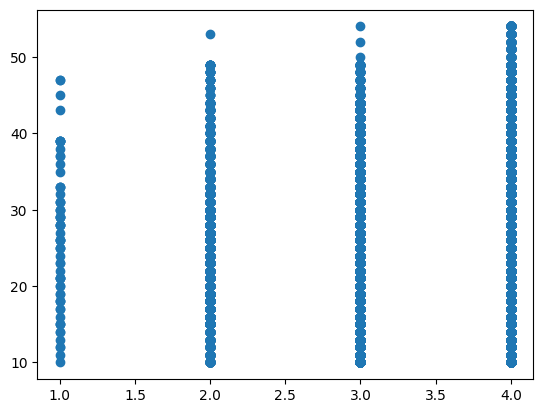

In [46]:
plt.scatter(data=df_new, x='Type_of_vehicle', y='Time_taken (min)')

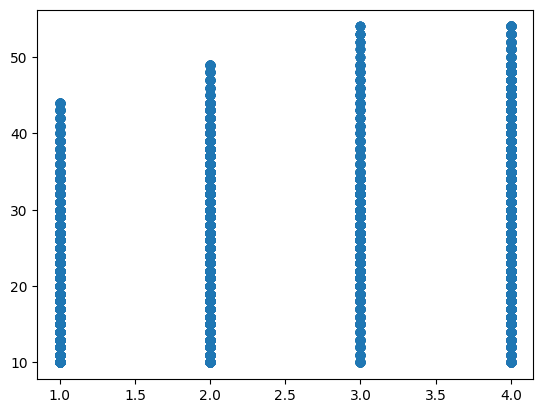

In [47]:
plt.scatter(data=df_new, x='Road_traffic_density', y='Time_taken (min)')

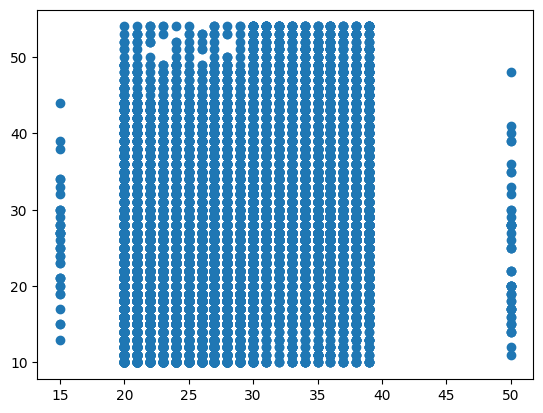

In [48]:
plt.scatter(data=df_new, x='Delivery_person_Age', y='Time_taken (min)')

In [49]:
df_new.to_csv('data/final_cleaned_train.csv')